**LINN CAO NGUYEN PHUONG**

Fall 2021

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [16]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a) Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [17]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b) Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c) Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean sum of squares error.

The plot created by running the below cell should "look right" to you.

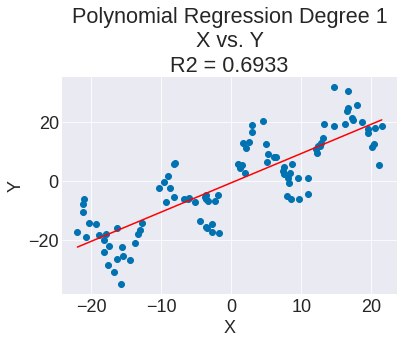

In [18]:
from data import Data
from linear_regression import LinearRegression

poly_data = Data('data/poly_data.csv')
lin_reg = LinearRegression(poly_data)
lin_reg.poly_regression(['X'], 'Y', 1)
lin_reg.scatter('X', 'Y', 'Polynomial Regression Degree 1')

plt.show()

In [19]:
print(lin_reg.mean_sse())

71.81095284569933


#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

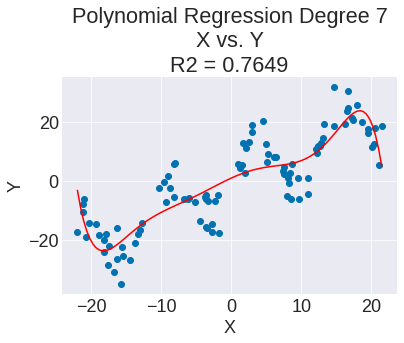

In [20]:
poly_data = Data('data/poly_data.csv')
lin_reg = LinearRegression(poly_data)
lin_reg.poly_regression(['X'], 'Y', 7)
lin_reg.scatter('X', 'Y', 'Polynomial Regression Degree 7')

plt.show()

**Question 5:** Describe the fit compared to `p=1` — is it better or worse? Why?

**Question 6:** Describe what happens visually and in terms of the $R^2$ and MSE values as you experiment with the polynomial degree between 1 and 7. Please include graphs to back up your argument.

**Answer 5:** The fit is better compared to p = 1, because it captures more data points and follows the data trend better than when p = 1. Moreover, R squared is also closer to 1 when p = 7 than when p = 1.

**Answer 6:** As the polynomial degree increases from 1 to 7, the slope will capture more data points and follows the data trend better. R^2 will also increase and MSE will decrease.

Degree 1 MSE: 71.81095284569933
Degree 2 MSE: 71.76196386502876
Degree 3 MSE: 69.87982260694507
Degree 4 MSE: 68.56155885782587
Degree 5 MSE: 58.79729687078312
Degree 6 MSE: 58.397592904303636
Degree 7 MSE: 55.03088073278098


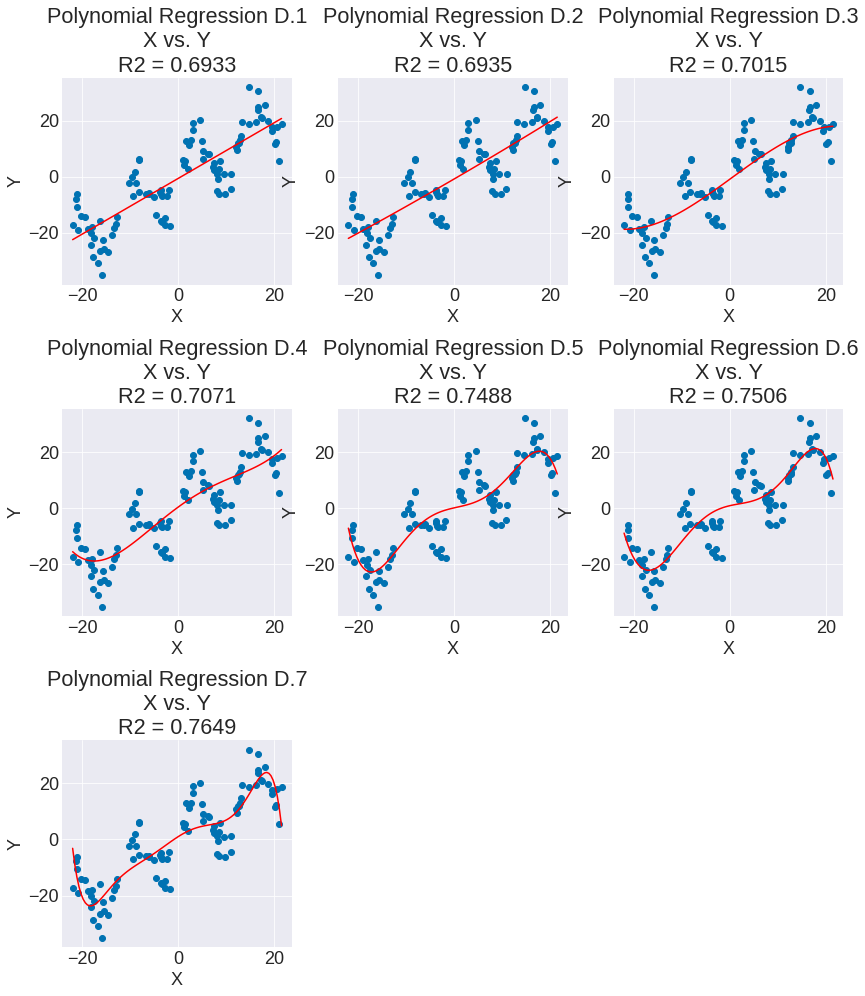

In [21]:
plt.figure(figsize = (14,16))

fig1 = plt.subplot(331)
lin_reg.poly_regression(['X'], 'Y', 1)
lin_reg.scatter('X', 'Y', 'Polynomial Regression D.1')
print("Degree 1 MSE: " + str(lin_reg.mean_sse()))

fig2 = plt.subplot(332)
lin_reg.poly_regression(['X'], 'Y', 2)
lin_reg.scatter('X', 'Y', 'Polynomial Regression D.2')
print("Degree 2 MSE: " + str(lin_reg.mean_sse()))

fig3 = plt.subplot(333)
lin_reg.poly_regression(['X'], 'Y', 3)
lin_reg.scatter('X', 'Y', 'Polynomial Regression D.3')
print("Degree 3 MSE: " + str(lin_reg.mean_sse()))

fig4 = plt.subplot(334)
lin_reg.poly_regression(['X'], 'Y', 4)
lin_reg.scatter('X', 'Y', 'Polynomial Regression D.4')
print("Degree 4 MSE: " + str(lin_reg.mean_sse()))

fig5 = plt.subplot(335)
lin_reg.poly_regression(['X'], 'Y', 5)
lin_reg.scatter('X', 'Y', 'Polynomial Regression D.5')
print("Degree 5 MSE: " + str(lin_reg.mean_sse()))

fig6 = plt.subplot(336)
lin_reg.poly_regression(['X'], 'Y', 6)
lin_reg.scatter('X', 'Y', 'Polynomial Regression D.6')
print("Degree 6 MSE: " + str(lin_reg.mean_sse()))

fig7 = plt.subplot(337)
lin_reg.poly_regression(['X'], 'Y', 7)
lin_reg.scatter('X', 'Y', 'Polynomial Regression D.7')
print("Degree 7 MSE: " + str(lin_reg.mean_sse()))

plt.subplots_adjust(hspace=0.6)

plt.show()

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a) Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [22]:
poly_data = Data('data/poly_data.csv')
poly_data.limit_samples(0, 50)
fit = poly_data
print(fit)

poly_data = Data('data/poly_data.csv')
poly_data.limit_samples(50, 100)
validation = poly_data
print(validation)

data/poly_data.csv (50x2)
Headers:
  X  Y
-------------------------------
Showing first 5/50 rows.
2.147    11.382    
9.465    1.034    
4.52    20.251    
1.974    2.89    
-3.358    -6.809    

-------------------------------

data/poly_data.csv (50x2)
Headers:
  X  Y
-------------------------------
Showing first 5/50 rows.
-3.65    -4.658    
9.69    -6.107    
-21.986    -17.271    
-8.694    -2.22    
-15.536    -25.608    

-------------------------------



Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b) Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

Fit MSSE: 38.302581840518535
Validation MSSE: 96.45877618744639


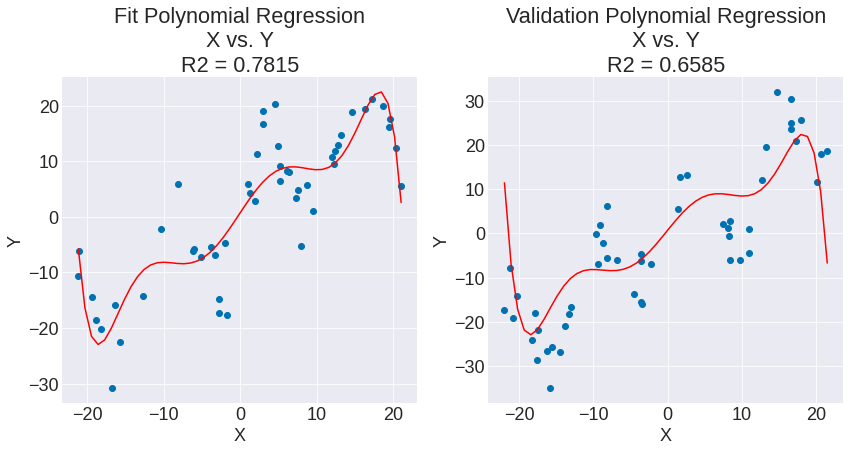

In [23]:
poly_data = Data('data/poly_data.csv')
poly_data.limit_samples(0, 50)
fit_data = poly_data
lin_reg_fit = LinearRegression(fit_data)

poly_data = Data('data/poly_data.csv')
poly_data.limit_samples(50, 100)
validation_data = poly_data
lin_reg_validation = LinearRegression(validation_data)

plt.figure(figsize = (14,6))

fig1 = plt.subplot(121)
lin_reg_fit.poly_regression(['X'], 'Y', 7)
lin_reg_fit.scatter('X', 'Y', 'Fit Polynomial Regression')
print("Fit MSSE: " + str(lin_reg_fit.mean_sse()))

fig2 = plt.subplot(122)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 7)
lin_reg_validation.scatter('X', 'Y', 'Validation Polynomial Regression')
print("Validation MSSE: " + str(lin_reg_validation.mean_sse()))

plt.show()

**Question 7:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 8:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSSE, $R^2$).

**Question 9:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 10:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSSE, $R^2$).

**Answer 7:** The fitted coefficients obtained for the fit set does not do a good job in generalizing to the validation set, because the MSSE is big and R^2 not close to 1 for both sets. 

**Answer 8:** The generalization worsens from polynomial degrees 1 to 4, and improves from polynomial degrees 5 to 6. This is because MSSE increases and R^2 decreases from polynomial degrees 1 to 4, while MSSE decreases and R^2 increases from polynomial degrees 5 to 6.

**Answer 9:** The generalization improves from polynomial degrees 5 to 11, because MSSE decreases and R^2 increases from polynomial degrees 5 to 11. Especially at polynomial degree 11, MSSE has the smallest value and R^2 is the biggest value. 

**Answer 10:** The generalization improves from polynomial degrees 5 to 11, and worsens from polynomial degrees 12 to 13. This is because MSSE decreases and R^2 increases from polynomial degrees 5 to 1, while MSSE increases and R^2 decreases from polynomial degrees 12 to 13. This happens because starting from polynomial degree 12, we have overfitting.

In [24]:
lin_reg_fit.poly_regression(['X'], 'Y', 1)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 1)
print("Fit MSSE Degree 1: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 1: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 1: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 1: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 2)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 2)
print("\nFit MSSE Degree 2: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 2: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 2: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 2: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 3)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 3)
print("\nFit MSSE Degree 3: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 3: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 3: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 3: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 4)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 4)
print("\nFit MSSE Degree 4: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 4: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 4: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 4: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 5)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 5)
print("\nFit MSSE Degree 5: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 5: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 5: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 5: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 6)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 6)
print("\nFit MSSE Degree 6: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 6: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 6: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 6: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 7)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 7)
print("\nFit MSSE Degree 7: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 7: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 7: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 7: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 8)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 8)
print("\nFit MSSE Degree 8: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 8: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 8: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 8: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 9)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 9)
print("\nFit MSSE Degree 9: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 9: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 9: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 9: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 10)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 10)
print("\nFit MSSE Degree 10: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 10: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 10: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 10: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 11)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 11)
print("\nFit MSSE Degree 11: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 11: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 11: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 11: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 12)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 12)
print("\nFit MSSE Degree 12: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 12: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 12: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 12: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

lin_reg_fit.poly_regression(['X'], 'Y', 13)
lin_reg_validation.initialize(['X'], 'Y', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 13)
print("\nFit MSSE Degree 13: " + str(lin_reg_fit.mean_sse()))
print("Fit R^2 Degree 13: " + str(lin_reg_fit.r_squared(lin_reg_fit.predict())))
print("Validation MSSE Degree 13: " + str(lin_reg_validation.mean_sse()))
print("Validation R^2 Degree 13: " + str(lin_reg_validation.r_squared(lin_reg_validation.predict())))

Fit MSSE Degree 1: 59.59921097570393
Fit R^2 Degree 1: 0.6600388084752988
Validation MSSE Degree 1: 88.58467771864787
Validation R^2 Degree 1: 0.6863898169307059

Fit MSSE Degree 2: 59.40840801582888
Fit R^2 Degree 2: 0.6611271719036671
Validation MSSE Degree 2: 89.27378847228444
Validation R^2 Degree 2: 0.6839502059825309

Fit MSSE Degree 3: 53.48828745123431
Fit R^2 Degree 3: 0.6948962639463439
Validation MSSE Degree 3: 93.01736764114754
Validation R^2 Degree 3: 0.6706970726109747

Fit MSSE Degree 4: 52.62252388256084
Fit R^2 Degree 4: 0.6998346852704935
Validation MSSE Degree 4: 91.37791686898338
Validation R^2 Degree 4: 0.6765011063336517

Fit MSSE Degree 5: 49.80778219474408
Fit R^2 Degree 5: 0.7158903162488051
Validation MSSE Degree 5: 79.81817770124293
Validation R^2 Degree 5: 0.7174252481829053

Fit MSSE Degree 6: 49.69955230297777
Fit R^2 Degree 6: 0.7165076727936502
Validation MSSE Degree 6: 79.18969401047093
Validation R^2 Degree 6: 0.7196502253504587

Fit MSSE Degree 7: 38.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

**Extension 1:**

My first extension is running linear regression on the data set `bluegills.csv`. Looking at the trend of the data, I can guess that the relationship between `age` and `length` variables are not linear, since at age 1 and 6, the length seems to be on the lower end when compared to the trend of the length in ages 2 to 5.

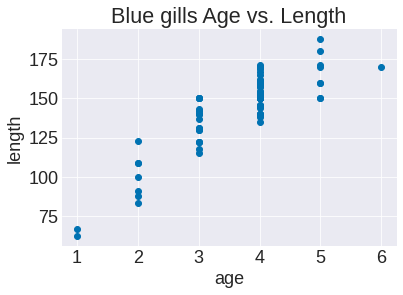

In [25]:
from analysis import Analysis

gill_data = Data('data/bluegills.csv')
gil_an = Analysis(gill_data)
gil_an.scatter('age', 'length', 'Blue gills Age vs. Length')

plt.show()

After running linear regression on the data set, plotting it out and calculating R squared and MSSE, we can see that polynomial degree 1 does not work well with the model. This is because R squared is not very close to 1 and MSSE is also big.

MSSE: 152.472266487949


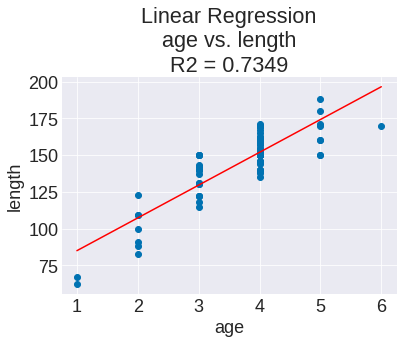

In [26]:
lin_reg_gill = LinearRegression(gill_data)
lin_reg_gill.linear_regression(['age'], 'length')
lin_reg_gill.scatter('age', 'length', 'Linear Regression')
print("MSSE: " + str(lin_reg_gill.mean_sse()))

plt.show()

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

**Extension 2:**

My second extension is researching and implementing 3 other linear regression solver methods in `linear_regression.py`, which are Gradient Descent method (`gradient_descent()`), Normal Equation method (`normal_equation()`), and Singular Value Decomposition method (`svd()`). 

Gradient Descent is an iterative optimization algorithm to find the minimum of a function. 

In Normal Equation method, we solve directly for the value of our coefficient. In short, in one step, we reach our optical minimum point, or we can say only in one step we fit our hypothesis to our data with the lowest cost possible. 

Singular Value Decomposition (SVD) is used as a preprocessing step to reduce the number of dimensions for our learning algorithm. SVD decomposes a matrix into a product of three other matrices (U, S, V). Once our matrix has been decomposed, the coefficients for our hypothesis can be found by calculating the pseudoinverse of the input matrix `self.A` and multiplying that by the output vector `self.y`. After that, we fit our hypothesis to our data, and that gives us the lowest cost.

In [31]:
gill_data = Data('data/bluegills.csv')
lin_reg_gill = LinearRegression(gill_data)
lin_reg_gill.linear_regression(['age'], 'length')
print("Original R^2: " + str(lin_reg_gill.r_squared(lin_reg_gill.predict())))
print("Original MSSE: " + str(lin_reg_gill.mean_sse()))

# EXTENSION 2.1: Gradient Descent method
lin_reg_gill.gradient_descent(['age'], 'length')
print("\nGradient Descent R^2: " + str(lin_reg_gill.R2))
print("Gradient Descent MSSE: " + str(lin_reg_gill.m_sse))

# EXTENSION 2.2: Normal Equation method
lin_reg_gill.normal_equation(['age'], 'length')
print("\nNormal Equation R^2: " + str(lin_reg_gill.R2))
print("Normal Equation MSSE: " + str(lin_reg_gill.m_sse))

# EXTENSION 2.3: Singular Value Decomposition method
lin_reg_gill.svd(['age'], 'length')
print("\nSingular Value Decomposition R^2: " + str(lin_reg_gill.R2))
print("Singular Value Decomposition MSSE: " + str(lin_reg_gill.m_sse))

Original R^2: 0.734882147178252
Original MSSE: 152.472266487949

Gradient Descent R^2: 0.31263356667906994
Gradient Descent MSSE: 395.31218618704287

Normal Equation R^2: 0.3214238257783646
Normal Equation MSSE: 390.25680906467716

Singular Value Decomposition R^2: 0.32142382577836426
Singular Value Decomposition MSSE: 390.2568090646773


After running the original linear regression and the other three linear regression solver methods, we can see that the original regression works the best on the data set. This is because it generates the biggest value of R squared and the smallest value of MSSE. The other three methods generate values of R squared and MSSE that are quite similar to one another, thus have a fairly equal performance.

In [32]:
diamond_data = Data('data/diamonds.csv')
lin_reg_diamond = LinearRegression(diamond_data)

lin_reg_diamond.linear_regression(['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z'], 'price')
print("Original R^2: " + str(lin_reg_diamond.r_squared(lin_reg_diamond.predict())))
print("Original MSSE: " + str(lin_reg_diamond.mean_sse()))

lin_reg_diamond.gradient_descent(['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z'], 'price')
print("\nGradient Descent R^2: " + str(lin_reg_diamond.R2))
print("Gradient Descent MSSE: " + str(lin_reg_diamond.m_sse))

lin_reg_diamond.normal_equation(['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z'], 'price')
print("\nNormal Equation R^2: " + str(lin_reg_diamond.R2))
print("Normal Equation MSSE: " + str(lin_reg_diamond.m_sse))

lin_reg_diamond.svd(['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z'], 'price')
print("\nSingular Value Decomposition R^2: " + str(lin_reg_diamond.R2))
print("Singular Value Decomposition MSSE: " + str(lin_reg_diamond.m_sse))

Original R^2: 0.9347813653924549
Original MSSE: 75396.39589265268

Gradient Descent R^2: -1.440392739764134e+81
Gradient Descent MSSE: 1.665174714277067e+87

Normal Equation R^2: 0.875832827538878
Normal Equation MSSE: 143544.20861590654

Singular Value Decomposition R^2: 0.875832827538878
Singular Value Decomposition MSSE: 143544.20861590657


A condition number for a matrix and computational task measures how sensitive the answer is to perturbations in the input data and to roundoff errors made during the solution process. A dataset with a poor matrix condition number is a multicollinearity dataset, which exists when one or more independent variables are highly correlated with each other. This poses a problem when the correlation between variables becomes higher. As the degree of collinearity increases, so does the size and volatility of the regression coefficient. This leads to higher sample to sample variability. This renders the variable in question unreliable as a predictor in a regression equation. The confidence interval of the coefficient in question becomes very large and this makes rejection of any null hypothesis near impossible. As the research question is in the alternate hypothesis, our chance of getting to it is hindered by lack of statistical significance of the regression coefficient. 

In the `diamonds.csv` dataset, there is a strong linear relationship between `carat` and `x`, `y` and `z`. Thus, the dataset is ill-conditioned. Among the 4 methods, the original method still works the best. Another method to consider would be to use other regression methods such as partial least squares (PLS) as this does not crumble in the face of multicollinearity.

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`).

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

**Extension 3:**

My third extension is running polynomial regression on other datasets.

MSSE D.2: 114.36789171210619
MSSE D.3: 114.30392579532999
MSSE D.4: 113.89550468986162
MSSE D.5: 112.9831235570164
MSSE D.6: 112.9831235570164
MSSE D.7: 112.98312355701633
MSSE D.8: 112.9831235570164
MSSE D.9: 112.9831235570164
MSSE D.10: 112.98312355701637


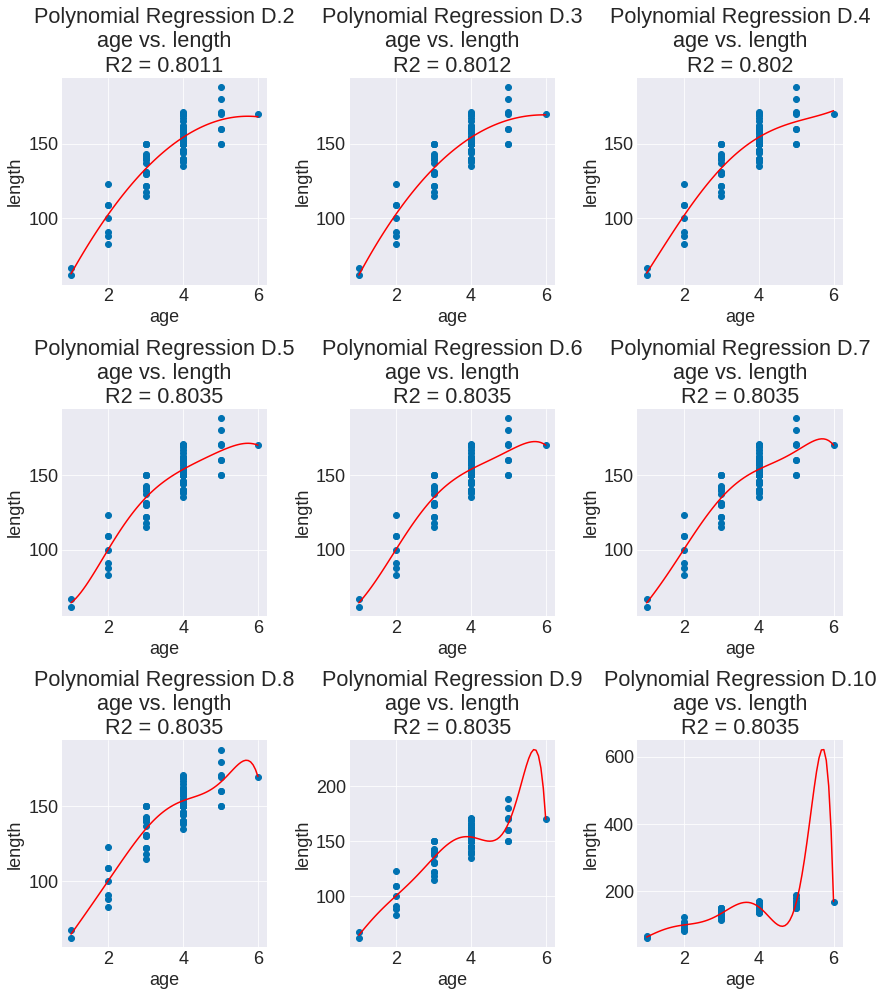

In [14]:
plt.figure(figsize = (14,16))

fig1 = plt.subplot(331)
lin_reg_gill.poly_regression(['age'], 'length', 2)
lin_reg_gill.scatter('age', 'length', 'Polynomial Regression D.2')
print("MSSE D.2: " + str(lin_reg_gill.mean_sse()))

fig2 = plt.subplot(332)
lin_reg_gill.poly_regression(['age'], 'length', 3)
lin_reg_gill.scatter('age', 'length', 'Polynomial Regression D.3')
print("MSSE D.3: " + str(lin_reg_gill.mean_sse()))

fig3 = plt.subplot(333)
lin_reg_gill.poly_regression(['age'], 'length', 4)
lin_reg_gill.scatter('age', 'length', 'Polynomial Regression D.4')
print("MSSE D.4: " + str(lin_reg_gill.mean_sse()))

fig4 = plt.subplot(334)
lin_reg_gill.poly_regression(['age'], 'length', 5)
lin_reg_gill.scatter('age', 'length', 'Polynomial Regression D.5')
print("MSSE D.5: " + str(lin_reg_gill.mean_sse()))

fig5 = plt.subplot(335)
lin_reg_gill.poly_regression(['age'], 'length', 6)
lin_reg_gill.scatter('age', 'length', 'Polynomial Regression D.6')
print("MSSE D.6: " + str(lin_reg_gill.mean_sse()))

fig6 = plt.subplot(336)
lin_reg_gill.poly_regression(['age'], 'length', 7)
lin_reg_gill.scatter('age', 'length', 'Polynomial Regression D.7')
print("MSSE D.7: " + str(lin_reg_gill.mean_sse()))

fig7 = plt.subplot(337)
lin_reg_gill.poly_regression(['age'], 'length', 8)
lin_reg_gill.scatter('age', 'length', 'Polynomial Regression D.8')
print("MSSE D.8: " + str(lin_reg_gill.mean_sse()))

fig8 = plt.subplot(338)
lin_reg_gill.poly_regression(['age'], 'length', 9)
lin_reg_gill.scatter('age', 'length', 'Polynomial Regression D.9')
print("MSSE D.9: " + str(lin_reg_gill.mean_sse()))

fig9 = plt.subplot(339)
lin_reg_gill.poly_regression(['age'], 'length', 10)
lin_reg_gill.scatter('age', 'length', 'Polynomial Regression D.10')
print("MSSE D.10: " + str(lin_reg_gill.mean_sse()))

plt.subplots_adjust(hspace=0.6)
plt.subplots_adjust(wspace=0.4)

plt.show()

With the original data set, we can see that R squared increases and MSSE decreases as the polynomial degree increases from 1 to 5, and afterwards the 2 variables remain very stable as the polynomial degree increases from 5 to 10. However, when looking into MSSE, we can see that at polynomial degree 7, MSSE has the smallest value out of the 10 values.

Fit MSSE D.2: 99.35323574815672
Validation MSSE D.2: 161.56750672614655
Fit MSSE D.3: 99.34767371356965
Validation MSSE D.3: 159.91079000189615
Fit MSSE D.4: 99.34725274725275
Validation MSSE D.4: 160.40097331240054
Fit MSSE D.5: 99.34725274725272
Validation MSSE D.5: 156.75543148824886
Fit MSSE D.6: 99.34725274725274
Validation MSSE D.6: 157.07417279747287
Fit MSSE D.7: 99.34725274725277
Validation MSSE D.7: 1108.1889025330495


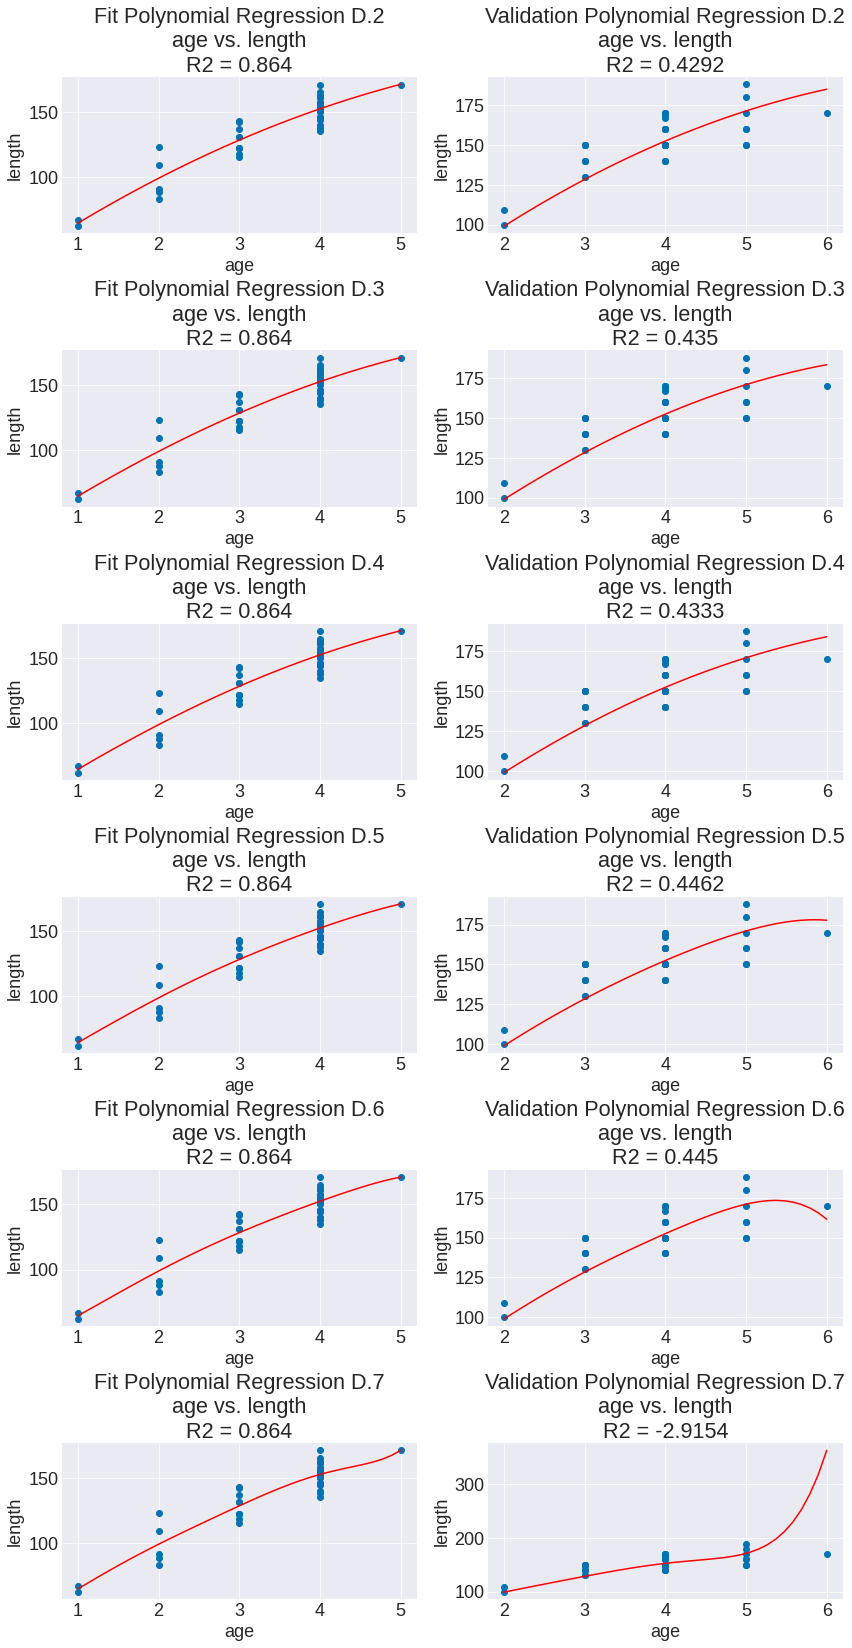

In [15]:
gill_data = Data('data/bluegills.csv')
gill_data.limit_samples(0, 39)
fit_data = gill_data
lin_reg_fit = LinearRegression(fit_data)

gill_data = Data('data/bluegills.csv')
gill_data.limit_samples(39, 78)
validation_data = gill_data
lin_reg_validation = LinearRegression(validation_data)

plt.figure(figsize = (14,28))

fig1 = plt.subplot(621)
lin_reg_fit.poly_regression(['age'], 'length', 2)
lin_reg_fit.scatter('age', 'length', 'Fit Polynomial Regression D.2')
print("Fit MSSE D.2: " + str(lin_reg_fit.mean_sse()))

fig2 = plt.subplot(622)
lin_reg_validation.initialize(['age'], 'length', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 2)
lin_reg_validation.scatter('age', 'length', 'Validation Polynomial Regression D.2')
print("Validation MSSE D.2: " + str(lin_reg_validation.mean_sse()))

fig3 = plt.subplot(623)
lin_reg_fit.poly_regression(['age'], 'length', 3)
lin_reg_fit.scatter('age', 'length', 'Fit Polynomial Regression D.3')
print("Fit MSSE D.3: " + str(lin_reg_fit.mean_sse()))

fig4 = plt.subplot(624)
lin_reg_validation.initialize(['age'], 'length', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 3)
lin_reg_validation.scatter('age', 'length', 'Validation Polynomial Regression D.3')
print("Validation MSSE D.3: " + str(lin_reg_validation.mean_sse()))

fig5 = plt.subplot(625)
lin_reg_fit.poly_regression(['age'], 'length', 4)
lin_reg_fit.scatter('age', 'length', 'Fit Polynomial Regression D.4')
print("Fit MSSE D.4: " + str(lin_reg_fit.mean_sse()))

fig6 = plt.subplot(626)
lin_reg_validation.initialize(['age'], 'length', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 4)
lin_reg_validation.scatter('age', 'length', 'Validation Polynomial Regression D.4')
print("Validation MSSE D.4: " + str(lin_reg_validation.mean_sse()))

fig7 = plt.subplot(627)
lin_reg_fit.poly_regression(['age'], 'length', 5)
lin_reg_fit.scatter('age', 'length', 'Fit Polynomial Regression D.5')
print("Fit MSSE D.5: " + str(lin_reg_fit.mean_sse()))

fig8 = plt.subplot(628)
lin_reg_validation.initialize(['age'], 'length', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 5)
lin_reg_validation.scatter('age', 'length', 'Validation Polynomial Regression D.5')
print("Validation MSSE D.5: " + str(lin_reg_validation.mean_sse()))

fig9 = plt.subplot(629)
lin_reg_fit.poly_regression(['age'], 'length', 6)
lin_reg_fit.scatter('age', 'length', 'Fit Polynomial Regression D.6')
print("Fit MSSE D.6: " + str(lin_reg_fit.mean_sse()))

fig10 = plt.subplot(6,2,10)
lin_reg_validation.initialize(['age'], 'length', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 6)
lin_reg_validation.scatter('age', 'length', 'Validation Polynomial Regression D.6')
print("Validation MSSE D.6: " + str(lin_reg_validation.mean_sse()))

fig11 = plt.subplot(6,2,11)
lin_reg_fit.poly_regression(['age'], 'length', 7)
lin_reg_fit.scatter('age', 'length', 'Fit Polynomial Regression D.7')
print("Fit MSSE D.7: " + str(lin_reg_fit.mean_sse()))

fig12 = plt.subplot(6,2,12)
lin_reg_validation.initialize(['age'], 'length', lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 7)
lin_reg_validation.scatter('age', 'length', 'Validation Polynomial Regression D.7')
print("Validation MSSE D.7: " + str(lin_reg_validation.mean_sse()))

plt.subplots_adjust(hspace=0.75)

plt.show()

The difference between the MSSE and R squared for the fit and validation sets are notable, in that the variables of the fit set follow the trend of those of the original data set. However, when applying fit set's coefficients to validation set, the validation set's R squared is much smaller while MSSE is much bigger. Moreover, despite the fact that polynomial degree 7 seems to work best with the original data set, degree 7 performs the worst with the validation set. 

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.